In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report


In [18]:
df = pd.read_csv("../csv/city_pov.csv", encoding="latin-1")

In [19]:
df.shape

(605, 73)

In [20]:
df.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_VC03', 'HC01_VC27',
       'HC01_VC66', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC70',
       'HC01_VC74', 'HC01_VC75', 'HC01_VC76', 'HC01_VC77', 'HC01_VC78',
       'HC01_VC79', 'HC01_VC80', 'HC01_VC81', 'HC01_VC82', 'HC01_VC83',
       'HC01_VC84', 'HC01_VC85', 'HC01_VC86', 'HC01_VC89', 'HC01_VC91',
       'HC01_VC93', 'HC01_VC97', 'HC01_VC99', 'HC01_VC101', 'HC01_VC103',
       'HC01_VC104', 'HC01_VC105', 'HC01_VC106', 'HC01_VC107', 'HC01_VC108',
       'HC01_VC109', 'HC01_VC110', 'HC01_VC111', 'HC01_VC112', 'HC01_VC113',
       'HC01_VC114', 'HC01_VC115', 'HC01_VC118', 'HC01_VC120', 'HC01_VC121',
       'HC01_VC122', 'HC01_VC124', 'HC01_VC125', 'HC01_VC126', 'HC01_VC130',
       'HC01_VC131', 'HC01_VC132', 'HC01_VC133', 'HC01_VC134', 'HC01_VC137',
       'HC01_VC138', 'HC01_VC141', 'HC01_VC142', 'HC01_VC143', 'HC01_VC144',
       'HC01_VC145', 'HC01_VC146', 'HC01_VC147', 'HC01_VC148', 'HC01_VC149',
       'HC01_VC150', 'HC

In [21]:
df.loc[df["HC01_VC86"] < 50000, "HC01_VC86"] = 0
df.loc[df["HC01_VC86"] > 50000, "HC01_VC86"] = 1

In [22]:
df["HC01_VC86"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
583    1
584    1
585    1
586    1
587    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    0
598    1
599    0
600    0
601    0
602    1
603    0
604    0
Name: HC01_VC86, Length: 605, dtype: int64

In [23]:
target = df["HC01_VC86"]
target_names = ["poor", "not poor"]

In [24]:
data = df.drop(['GEO.id2', 'GEO.id', 'GEO.display-label', "HC01_VC86"], axis=1)
feature_names = data.columns

In [25]:
data = data.fillna(0)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [27]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.967


In [29]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

       poor       1.00      0.71      0.83        17
   not poor       0.96      1.00      0.98       135

avg / total       0.97      0.97      0.96       152



In [30]:
X[:, 0]


NameError: name 'X' is not defined

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.908
k: 3, Train/Test Score: 0.978/0.914
k: 5, Train/Test Score: 0.971/0.928
k: 7, Train/Test Score: 0.962/0.908
k: 9, Train/Test Score: 0.962/0.901
k: 11, Train/Test Score: 0.962/0.895
k: 13, Train/Test Score: 0.962/0.888
k: 15, Train/Test Score: 0.962/0.888
k: 17, Train/Test Score: 0.962/0.888
k: 19, Train/Test Score: 0.962/0.888


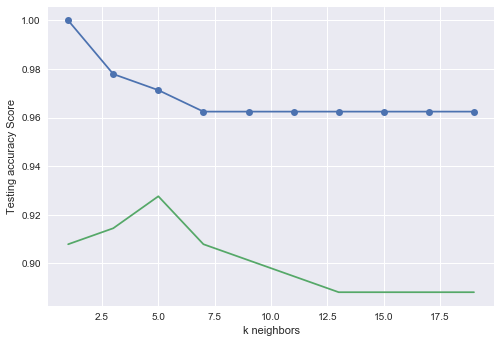

In [32]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.928
